# Text vectorization 

The current version performs the transformation of a text field (N x 1) -> (N x D) where (N X D) is a binary matrix of n-grams created or a matrix of n-grams counts after the input text field is processed.   

In [1]:
import csv
import pandas as pd

datafile = '/Users/elenalabzina/Documents/GitHub/DeconfounderAnalysis/data/death-penalty-cases.csv'
csv_file = open(datafile, mode='r')
csv_reader = csv.DictReader(csv_file)
data = pd.read_csv(datafile, encoding='utf-8')

text = pd.DataFrame(data[['snippet']])

text[0:5]

snippet
0  N.J. 501 (1965)\n213 A.2d 20\nIN RE WAIVER OF ...
1  whether the death penalty is, per se, unconsti...
2  #39;s contention that the assessment of the de...
3  .3d 673 (2009)\n2009-NMSC-053\nIN THE MATTER O...
4  assume the district attorney orally waived the...

(The snippet field from the deathpenalty dataset is used purely as a starting example. Feel free to replace it with other data source.)

## Initial cleaning: Cleansing, stemming and removal of the stopwords. 

In [2]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords 
from string import ascii_lowercase
from nltk import ngrams
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

stemmer = SnowballStemmer("english", ignore_stopwords=True)
tokenizer = RegexpTokenizer(r'[a-z]+')

##setting up and extending stopwords
stop = stopwords.words('english')
stop.extend(['nevertheless','would','nether''the','in','may','also','zero','one','two','three','four','five','six','seven','eight','nine','ten','quot','across','among','beside','however','yet','within']+list(ascii_lowercase))

#also we add 'death' and 'penalty' since they are very frequent 

stop.extend(['death','penalty'])

First, we are transforming our text field into tokens. This involves removing all unnecessary characters, converting all words to small case, and stemming. For example, "I am eating pizza" => ['eat','pizza'].

In [3]:
tokens = []

for statement in text['snippet']:
    words = tokenizer.tokenize(statement.lower())
    #print(words)
    words_clean = []
    for word in words:
        if word in stop: 
            continue
        words_clean.append(stemmer.stem(word))
    tokens.append(words_clean)    

tokens[0:1]

[['waiver',
  'suprem',
  'court',
  'new',
  'jersey',
  'septemb',
  'hellip',
  'counti',
  'court',
  'judg',
  'waiver',
  'suprem',
  'court',
  'concern',
  'excess',
  'hellip',
  'case',
  'prosecutor',
  'seek',
  'cogniz',
  'fact',
  'situat',
  'hellip',
  'although',
  'prosecutor',
  'right',
  'waiv',
  'inform',
  'juri',
  'juri',
  'hellip',
  'assum',
  'prosecutor',
  'return',
  'ask']]

## Creating n-grams

Now we make n-grams. n is set to 3 but feel free to modify it. Before getting the final X, we need to count the occurrence of n-grams to evaluate the distribution and make sense of the data. 

In [4]:
my_ngrams=[]
n=3

for token_group in tokens:
    ngram = list(ngrams(token_group,n))
    my_ngrams.append(ngram)
    
#my_ngrams[0:2]

/Users/elenalabzina/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: generator 'ngrams' raised StopIteration
  """


In [5]:
my_ngrams[0:2]

[[('waiver', 'suprem', 'court'),
  ('suprem', 'court', 'new'),
  ('court', 'new', 'jersey'),
  ('new', 'jersey', 'septemb'),
  ('jersey', 'septemb', 'hellip'),
  ('septemb', 'hellip', 'counti'),
  ('hellip', 'counti', 'court'),
  ('counti', 'court', 'judg'),
  ('court', 'judg', 'waiver'),
  ('judg', 'waiver', 'suprem'),
  ('waiver', 'suprem', 'court'),
  ('suprem', 'court', 'concern'),
  ('court', 'concern', 'excess'),
  ('concern', 'excess', 'hellip'),
  ('excess', 'hellip', 'case'),
  ('hellip', 'case', 'prosecutor'),
  ('case', 'prosecutor', 'seek'),
  ('prosecutor', 'seek', 'cogniz'),
  ('seek', 'cogniz', 'fact'),
  ('cogniz', 'fact', 'situat'),
  ('fact', 'situat', 'hellip'),
  ('situat', 'hellip', 'although'),
  ('hellip', 'although', 'prosecutor'),
  ('although', 'prosecutor', 'right'),
  ('prosecutor', 'right', 'waiv'),
  ('right', 'waiv', 'inform'),
  ('waiv', 'inform', 'juri'),
  ('inform', 'juri', 'juri'),
  ('juri', 'juri', 'hellip'),
  ('juri', 'hellip', 'assum'),
  ('hell

In [6]:
ngrams_dict=dict()
ngrams_counter=dict()
index = -1
max_occ=1
total = 0

for token_group in my_ngrams:
    for token in token_group:
        total = total + 1
        my_key = tuple(token)
        if my_key in ngrams_dict:
            ngrams_counter[my_key] = ngrams_counter[my_key]+1
            if (max_occ < ngrams_counter[my_key]): max_occ=ngrams_counter[my_key]
            continue
        index = index + 1
        ngrams_dict[my_key]=index
        ngrams_counter[my_key] = 1

### Filtering the distribution of the n-grams 

In [7]:
index, max_occ  



(364563, 2700)

Let's check the usual quantiles. 

In [8]:
import operator

ngrams_counter_sorted = sorted(ngrams_counter.items(), key=operator.itemgetter(1))
print(ngrams_counter_sorted[(int)(index*0.05)])
print(ngrams_counter_sorted[(int)(index*0.95)])

(('anoth', 'determin', 'whether'), 1)
(('base', 'record', 'us'), 3)


The data is very screwed. Let's have a look at some histograms: 

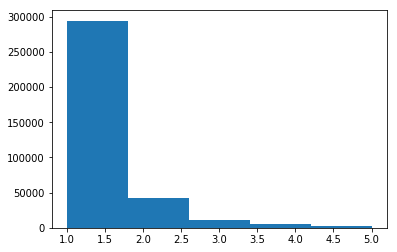

In [10]:
import matplotlib.pyplot as plt

plt.hist(ngrams_counter.values(),bins=5,range=(1,5))
plt.show()

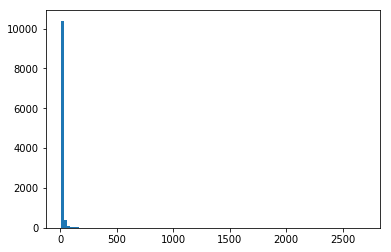

In [11]:
plt.hist(ngrams_counter.values(),bins=100,range=(5,max_occ))
plt.show()

What is the most frequent n-gram? 

In [12]:
mx=max(ngrams_counter.values())
print(mx)
print(total)

def return_all_val_from_dict(d,v): 
    l =list()
    for x, y in d.items():    
        if y == v: l.append(x)
    return l   

def count_in_dict(d,n):
    for x, y in d.items():    
        if y == v: return  

return_all_val_from_dict(ngrams_counter,mx)
# total

2700
581241


[('antiterror', 'effect', 'act')]

The chance for an n-gram to occur: $P(gram) = \frac{count(gram)}{total} = \frac{count(gram)}{581241}$. 

3-grams in our sample range in this respect: 
from $\frac{1}{total}$ to $\frac{mx}{total}$ = 1.7204567468571557e-06 to 0.00464523321651432

Let's pick only those that have the chance of occurrence of at least $0.0001$ or $ count(n-gram)>= 0.0001*total$  

This is (a bit) arb, but we need to pick some number to cut the tail off.   

In [13]:
cutoff = 0.00001*total
cutoff

5.812410000000001

In [14]:
ngrams_orderpos = list()

for key in ngrams_counter.keys():
    if ngrams_counter[key]<cutoff: continue
    ngrams_orderpos.append(key)
    
len(ngrams_orderpos)

8133

### Creating the final matrix

Hence, we decreased the number of variables from 364563 to 8133 by excluding the least frequent ones. Now we need to do the last step: to construct the binary matrix D:

In [15]:
import numpy as np

D = np.zeros(shape=(len(my_ngrams),len(ngrams_orderpos)))

index=-1

for index in range(0,len(my_ngrams)):
    for token in token_group:
        if token not in ngrams_orderpos: continue
        D[index, ngrams_orderpos.index(token)]=1

In [16]:
D.shape

(32567, 8133)

In [23]:
print('non-zeros')
print(np.sum(D))
print('zeros')
print(len(my_ngrams)*len(ngrams_orderpos))
print('total')
print(len(my_ngrams)*len(ngrams_orderpos)/np.sum(D))

non-zeros
97701.0
zeros
264867411
total
2711.0


## N of occurrences instead of binary values:

This task is very similar to the previous one. The only addition is that we need to count the number of occurrences of an n-gram for each observation. For many texts, the final matrix here is likely to be very similar for n>1 to the binary one constructed above. However, for larger texts these two approaches might produce very different results.

We are still interested only in the n-grams that have been filtered and now are stored in ngrams_orderpos. 

In [29]:
my_ngrams_counted = list()

for ngrams in my_ngrams:
    my_dict = dict()
    for ngram in ngrams:
        if ngram not in ngrams_orderpos: continue
        if ngram not in my_dict.keys(): 
            my_dict[ngram]=1
            continue
        my_dict[ngram] = my_dict[ngram] + 1
    my_ngrams_counted.append(my_dict)

In [35]:
my_ngrams_counted[7]

{('hellip', 'question', 'concern'): 1}

In [36]:
D_counted = np.zeros(shape=(len(my_ngrams),len(ngrams_orderpos)))

for index in range(0,len(my_ngrams_counted)):
    for key in my_ngrams_counted[index].keys():
        D_counted[index, ngrams_orderpos.index(key)]=my_ngrams_counted[index][key]

Let's compare to the binary case:

In [37]:
D_counted[1,:]

array([1., 1., 1., ..., 0., 0., 0.])

In [42]:
np.average(sum(D==D_counted))/len(D_counted)

0.9991574350383181

In [43]:
np.var(sum(D==D_counted))/(len(D_counted)^2)

11.988442027647327